In [2]:
from other_methods_implemenations  import *
import pandas as pd
import numpy as np

def create_data(n = 5000, m = 10):
    df = pd.DataFrame(np.random.randn(n, m)).add_prefix('feat_')
    df['marg'] = (np.random.randn(n) *1 + df.iloc[:,-1:].T.values[0] *99) / 100
    return df*100

c:\Users\mikol\Desktop\Master thesis\mcut_feature_selection\mcut_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
res2 = pd.Series()
df = create_data(1000)
mcut_feature_selection(df, 3, 'marg', np.mean, 7, mcut, 0, 100, 5)
for m in range(10, 1000, 100):
    for i in range(10):
        df = create_data(m = m)
        start = pd.Timestamp.now(tz = 'cet')
        feats = mcut_feature_selection(df, 3, 'marg', np.mean, 5, mcut, 0, 100, 5)
        res2.loc[f'{m}_{i}'] = ((pd.Timestamp.now(tz = 'cet') - start).total_seconds(), len(feats), feats)

Max condition is abs(mono)>0.5
Number of features is 910
I saved it as 'results'.
I saved importantn features due to the Lasso regression as an attribute 'important_features'.


In [2]:
import pandas as pd
# res2.to_pickle('../experiments_results/experiment_2_results.pkl')
res2 = pd.read_pickle('../experiments_results/experiment_2_results.pkl')

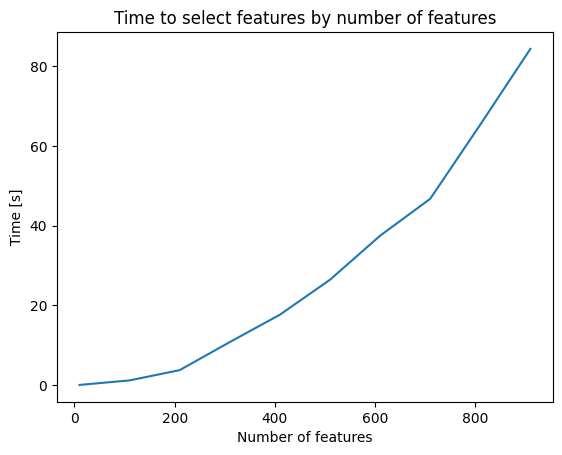

In [3]:
res2.groupby(res2.index.str.split('_').str[0].astype(int)).apply(lambda x: x.str[0].mean()).plot()
import matplotlib.pyplot as plt
plt.title('Time to select features by number of features')
plt.xlabel('Number of features')
plt.ylabel('Time [s]')

plt.savefig('../charts/exp2.png', format='png')
